In [1]:
import numpy as np
import pyvista as pv
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
points = pv.read("points.vtk").points

In [3]:
def objective(x, points):
    center = [x[0], x[1], x[2]]
    r = x[3]
#     return np.sum((np.linalg.norm(points - center, axis=1) - r)**2)
    result = np.sum(np.maximum(np.linalg.norm(points - center, axis=1) - r, 0.0))
    if result == 0.0:
        result += np.sum(np.abs(np.linalg.norm(points - center, axis=1) - r))
    return result

In [4]:
initial_center = np.mean(points, axis=0)
initial_radius = np.max(np.linalg.norm(points - initial_center, axis=1))

In [5]:
objective_vals = []
radii = np.arange(0.0, initial_radius * 2, 0.1)
for r in tqdm(radii):
    objective_vals.append(objective(np.append(initial_center, r), points))

  0%|          | 0/177 [00:00<?, ?it/s]

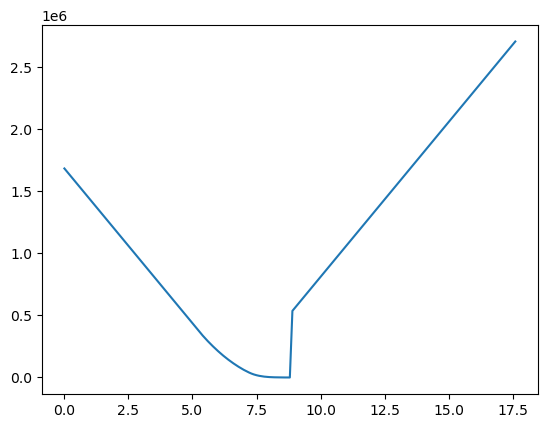

In [6]:
_ = plt.plot(radii, objective_vals)

In [7]:
initial_guess = np.append(initial_center, initial_radius)
res = minimize(objective, initial_guess, args=(points)).x

In [8]:
res

array([ 0.10330388,  0.04406122, -0.02191904,  8.817627  ], dtype=float32)

In [9]:
sphere = pv.Sphere(radius=res[3], center=[res[0], res[1], res[2]])

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


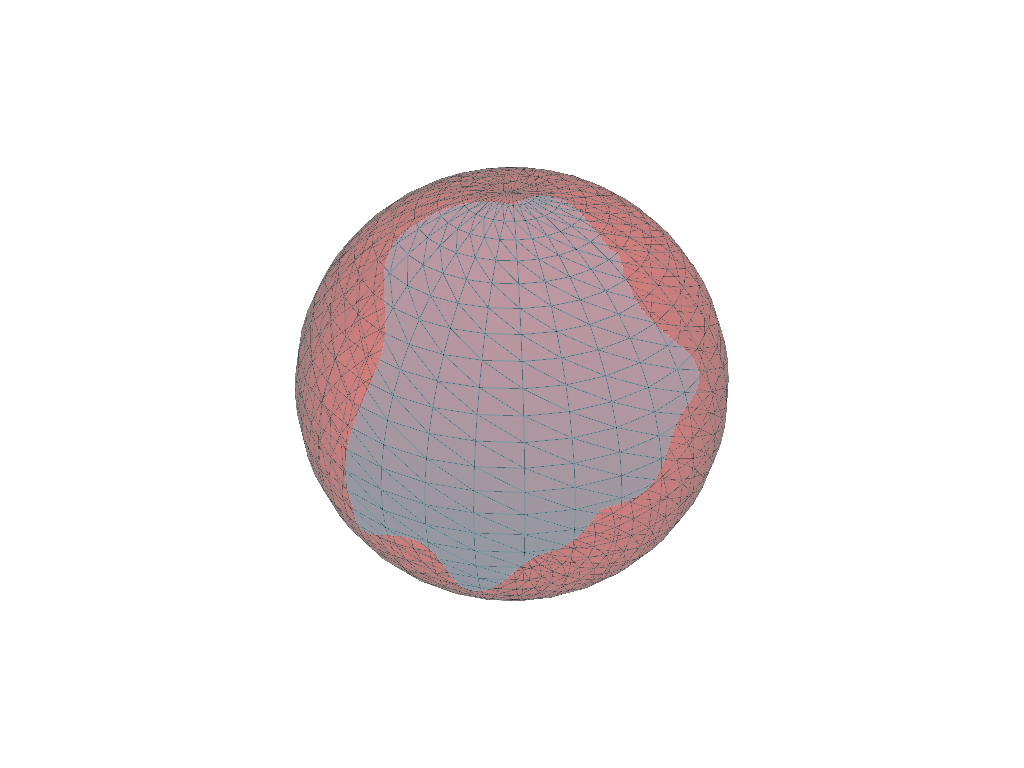

In [10]:
p = pv.Plotter()
p.add_mesh(points)
p.add_mesh(sphere, color="red", opacity=0.3, show_edges=True)
p.show()

In [11]:
objective([res[0], res[1], res[2], res[3]], points)

514963.9